In [3]:
#Importing all the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# loading the data
df = pd.read_csv(r'C:\Users\vishnu prince\Desktop\Second Semester\Applied ML\Project\cars\cars.csv')

In [3]:
#Dropping the records with odometer_value < 500 or price_usd < 1000$ 
df.drop(df[df['odometer_value'] < 500].index, inplace = True)
df.drop(df[df['price_usd'] < 1000].index, inplace = True)

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [4]:
#Removing irrelavant variables
df = df.drop(['location_region','number_of_photos','up_counter','feature_0',
                            'feature_1','feature_2','feature_3','feature_4','feature_5'
                            ,'feature_6','feature_7','feature_8','feature_9',
                            'duration_listed'], axis=1)

In [5]:
#Dropping Null values in engine_capacity column
df = df.dropna(subset=['engine_capacity'])

In [6]:
#All the columns with object datatype are stored in object_columns
object_columns = list(df.select_dtypes(include=['object']).columns)

In [7]:
#Doing One Hot Encoding on all the columns with object type
df_encoded = pd.get_dummies(data=df, columns=object_columns)
df_encoded.dtypes
df_encoded.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,190000,2010,False,2.5,False,10900.00,False,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,290000,2002,False,3.0,False,5000.00,True,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,402000,2001,False,2.5,False,2800.00,True,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,10000,1999,False,3.0,False,9999.00,True,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,280000,2001,False,2.5,False,2134.11,True,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [8]:
#Defining the X variable
X = df_encoded.drop('price_usd', axis=1)

In [9]:
#Defining the y Variable
y = df_encoded['price_usd']

In [10]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#RandomForestRegressor Model training and testing(Base Model)
RFReg = RandomForestRegressor()


In [15]:
RFReg.fit(X_train, y_train)
pred = RFReg.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


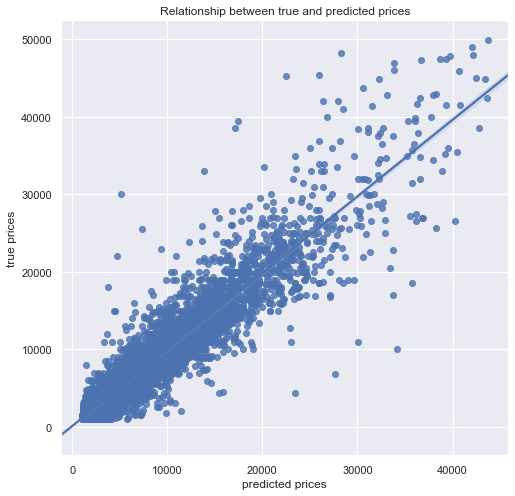

In [47]:
#Plot Between predicted Prices and the actual prices of used-cars
plt.figure(figsize= (8, 8))
sns.regplot(pred, y_test)
plt.ylabel('true prices')
plt.xlabel('predicted prices')
plt.title('Relationship between true and predicted prices')
plt.show()

In [18]:
print("Mean absolute error",mean_absolute_error(y_test, pred))
print("Mean Squared error",mean_squared_error(y_test, pred))
print("R2",r2_score(y_test, pred)*100)

Mean absolute error 1118.9154920372887
Mean Squared error 3858995.0083407257
R2 89.30496739859093


In [12]:
#Parameter Tuning using Random search method

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30 , num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [13]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 11, 17, 23, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}


In [19]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 16, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [20]:
#Fitting the model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 30.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [21]:
#Best parameters after running the random search method
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [22]:
#running on test data
pred1 = rf_random.predict(X_test)

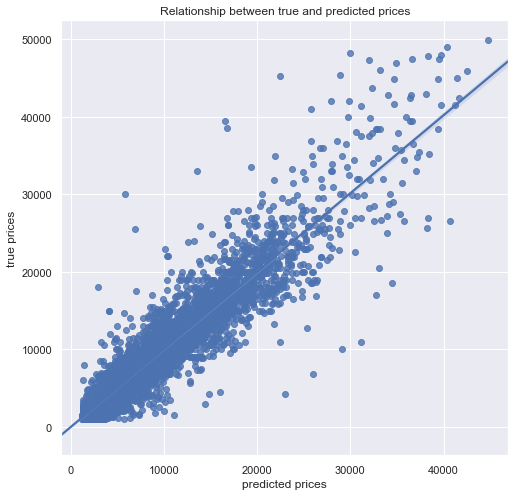

In [46]:
#Plot Between predicted Prices and the actual prices of used-cars on random search method
plt.figure(figsize= (8, 8))
sns.regplot(pred1, y_test)
plt.ylabel('true prices')
plt.xlabel('predicted prices')
plt.title('Relationship between true and predicted prices')
plt.show()

In [23]:
#R^2 , MSE, Mean Absolute error values after running the random search method
print("Mean absolute error",mean_absolute_error(y_test, pred1))
print("Mean Squared error",mean_squared_error(y_test, pred1))
print("R2",r2_score(y_test, pred1)*100)

Mean absolute error 1081.210729813323
Mean Squared error 3590316.633766117
R2 90.04959753393919


In [30]:
# Parameter tuning using Grid search method( based on the random search results)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [40,50,60],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [4,5,6,7],
    'n_estimators': [25,50,75,100]
}


In [31]:
# Creating a Grid search based model
rf_grid = RandomForestRegressor()
# Instantiate the grid search model
rf_gridsearch = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 28.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [33]:
rf_gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [34]:
#Running on the test set
pred2 = rf_gridsearch.predict(X_test)

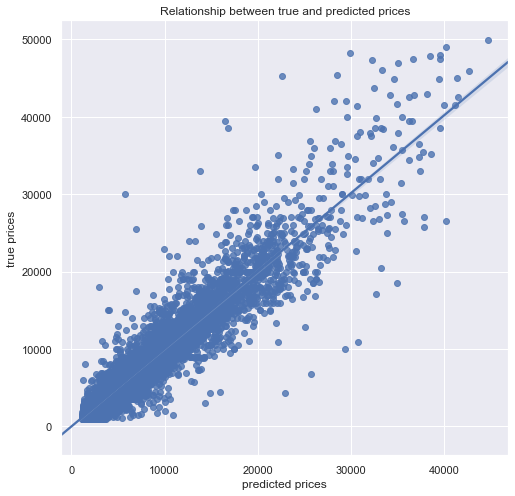

In [45]:
#Plot Between predicted Prices and the actual prices of used-cars on grid search method
plt.figure(figsize= (8, 8))
sns.regplot(pred2, y_test)
plt.ylabel('true prices')
plt.xlabel('predicted prices')
plt.title('Relationship between true and predicted prices')
plt.show()

In [40]:
#R^2, MSE, Mean Absolute error values after running the Grid search method
print("Mean absolute error",mean_absolute_error(y_test, pred2))
print("Mean Squared error",mean_squared_error(y_test, pred2))
print("R2",r2_score(y_test, pred2)*100)

Mean absolute error 1080.694777738364
Mean Squared error 3584074.855672075
R2 90.06689634361949
